In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

from access_science_shared import standardizer

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
from narrative import nar181026_heat_confidence_genes
from narrative import nar181205_networks

In [7]:
from scipy.stats import spearmanr
from natsort import natsorted

In [8]:
save_images = True

In [9]:
tissues_to_consider = ['BAT', 'Blood', 'GutEP', 'MuscSat', 'Adrenal', 'Kidney',
       'Heart', 'Liver', 'Skin', 'Stomach', 'Brain', 'SI',
       'LI', 'Cerebellum', 'WAT', 'Esophagus', 'Lung'] 

In [10]:
outfolder = '221007_RIN'

In [11]:
renamer = {
        'Adrenal': 'Adrenal Gland', 
        'BAT': 'Brown adipose tissue', 
        'Blood': 'Blood', 
        'Brain': 'Frontal cortex', 
        'Esophagus': 'Esophagus', 
        'GutEP': 'Gut epithelium', 
        'Heart': 'Heart',
        'Kidney': 'Kidney', 
        'LI': 'Large intestine', 
        'Liver': 'Liver', 
        'Lung': 'Lung', 
        'MuscSat': 'Muscle', 
        'SI': 'Small intestine', 
        'Skin': 'Skin',
        'Stomach': 'Stomach', 
        'WAT': 'White adipose tissue', 
        'Cerebellum': 'Cerebellum'}

In [12]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/other/direct_communication_from_rgrant/200611_RIN_scores/191106_RIN_scores.xlsx'

In [13]:
df = pd.read_excel(p)

In [14]:
df = df[df['sampleName'].str.contains('_F0_')]

In [15]:
df['tissue'] = df['sampleName'].str.extract('^M[0-9]{2}_(.*)?_[0-9]+[DM]_F')

In [16]:
df['tissue'] = df['tissue'].replace({'kidney': 'Kidney'})

In [17]:
df[~df['tissue'].isin(tissues_to_consider)]['tissue'].unique()

array(['AM', 'AT2', nan, 'Musc'], dtype=object)

In [18]:
df = df[df['tissue'].isin(tissues_to_consider)]

In [19]:
df['age']=df['sampleName'].str.extract('.*_([0-9]+)M').astype(float)

In [20]:
df['age'].value_counts()

4.0     78
12.0    78
18.0    77
24.0    77
9.0     76
1.0     44
5.0      4
Name: age, dtype: int64

In [21]:
df[df['age']==4]['tissue'].value_counts()

BAT          6
GutEP        6
SI           6
LI           6
Stomach      6
Adrenal      6
Lung         6
Esophagus    6
Blood        6
Liver        6
WAT          6
Skin         6
Kidney       6
Name: tissue, dtype: int64

In [22]:
df = df[df['age'].isin([4, 9, 12, 18, 24])]

In [23]:
df = df.dropna(subset=['RIN'])

In [24]:
df['above_8'] = df['RIN']>8

In [25]:
df['between_7_and_8'] =  (df['RIN']<=8) & (df['RIN']>=7)

In [26]:
df['below_7'] = df['RIN'] < 7

In [27]:
m = df[['age', 'above_8', 'between_7_and_8', 'below_7']].set_index('age').stack(
).to_frame('kind').reset_index()

In [28]:
m.head()

,age,level_1,kind
0,24.0,above_8,True
1,24.0,between_7_and_8,False
2,24.0,below_7,False
3,24.0,above_8,True
4,24.0,between_7_and_8,False


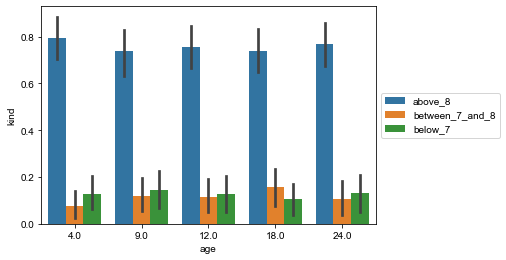

In [29]:
sns.barplot(x='age', y='kind', hue='level_1', data=m)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if save_images:
    export.export_image('{}/fractions.pdf'.format(outfolder))



In [32]:
m[m['kind']==True]['age'].value_counts().sort_index()

4.0     78
9.0     76
12.0    78
18.0    77
24.0    77
Name: age, dtype: int64

In [31]:
m['age'].value_counts()

4.0     234
12.0    234
18.0    231
24.0    231
9.0     228
Name: age, dtype: int64